# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [11]:
# importar librerías

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:

# cargar archivos

plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')



In [13]:
# mostrar las primeras 5 filas de plans

plans.head()

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [14]:
# mostrar las primeras 5 filas de users

users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [15]:
# mostrar las primeras 5 filas de usage

usage.head()


,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.


### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos. 
 

In [16]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)

plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [17]:
# inspección de plans con .info()

plans.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes



In [18]:
# inspección de users con .info()

users.info()
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB



In [19]:
# inspección de usage con .info()

usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [20]:

# cantidad de nulos para users

print("Cantidad de valores nulos (users)")
print(users.isna().sum())
print()

print("Proporción de valores nulos (users)")
print(users.isna().mean())
print()


Cantidad de valores nulos (users)
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

Proporción de valores nulos (users)
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64



In [21]:
# cantidad de nulos para usage

print("Cantidad de valores nulos (usage)")
print(usage.isna().sum())
print()

print("Proporción de valores nulos (usage)")
print(usage.isna().mean())

Cantidad de valores nulos (usage)
id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

Proporción de valores nulos (usage)
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64



✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

-Valores nulos

En users:
Las columnas con baja proporción de nulos <5%, se pueden imputar o dejar como NA sin impacto relevante.
Las columnas con proporción media 5–30%, hay que investigar causa y decidir imputación según lógica de negocio.

En usage:
Si existen nulos en variables clave de uso, se recomienda no imputar agresivamente y analizar si representan falta de actividad o error de registro.

-Acción recomendada:

Yo no eliminaría las columnas en esta etapa; marcaría nulos y los trataría en el paso de limpieza, ya que pueden contener información relevante.



### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [22]:
# explorar columnas numéricas de users

users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` veo que los 4000 users empiezan desde el número 10,000 en vez de empezar del 1
- La columna `age` veo un valor el valor minimo en -999 lo cual es incorrecto

In [23]:
# explorar columnas numéricas de usage

usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000


- Las columnas `id` y `user_id` veo que en id el valor va del 1 al 40,4000 y en user_id no hay valores ni rangos extraños 
- Las columnas `duration` y `lenght` veo un min de 0 lo cual puede ser un posible error y en lenght un max de 1490 lo cual indica un mensaje extremadamente largo lo cual es un posible outlier

In [24]:
# explorar columnas categóricas de users

columnas_user = ['city', 'plan']
users[columnas_user].describe()

,city,plan
count,3531,4000
unique,7,2
top,Bogotá,Basico
freq,808,2595


- La columna `city` veo que la distribucion no es uniforme, es decir que algunas ciudades concentran mas usuarios
- La columna `plan` veo que solo existen 2 planes lo cual es una segmentación clara

In [25]:

# explorar columna categórica de usage
usage['type'].value_counts()



text    22092
call    17908
Name: type, dtype: int64

- La columna `type` la suma de ambas da 40,000 lo cual nos indica que no hay valores nulos



---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
         En 'age' con valores menores a 0 y en 'duration' con valores iguales a 0 
- ¿Qué acción tomarías?
          Los valores imposibles los reemplazaría por NA y lo valores extremos se analizarían como outliers


### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [26]:

# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')


In [28]:


# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors='coerce')



In [29]:

# Revisar los años presentes en `reg_date` de users
users['reg_date'].dt.year.value_counts().sort_index()


2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64

En `reg_date` veo que el volumen de los registros en 2022, 2023 y 2024 son muy similares sin embargo tenemos registros en 2026 lo cual es imposible ya que el data ser solo tiene informacion hasta el 2024. Hubo un error de captura o carga

In [44]:
# Revisar los años presentes en `date` de usage
usage['date'].dt.year.value_counts().sort_index()

2024.0    39950
Name: date, dtype: int64

En `date` veo que 50 registros se quedaron como NaT tras la conversión debido a formatos de fecha invalods o tal vez valores vacíos.
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:


**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
      Aparecen años imposibles: en la columna reg_date se identifican registros con el año 2026, lo cual es   inconsistente dado que los datos solo están registrados hasta 2024.
    En la columna date de usage no se detectan años fuera de rango; todos los registros válidos corresponden a 2024, sin embargo tiene un número mínimo de fechas inválidas.
- ¿Qué harías con ellas?
  En reg_date: marcar como inválidas (NaT) las fechas con año mayor a 2024 y excluir esos registros del análisis.
  En date: mantener los valores NaT y excluirlos en análisis dependientes del tiempo, ya que representan una proporción mínima y no afectan las tendencias generales ya que hay una distribución coherente en los años válidos.



---


## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.



In [45]:

# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users["age"] != -999, "age"].median()
users["age"] = users["age"].replace(-999, age_mediana)

# Verificar cambios
users["age"].describe()

# Reemplazar ? por NA en city
users["city"] = users["city"].replace("?", pd.NA)

# Verificar cambios
users["city"].value_counts(dropna=False)

Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [51]:



# Reemplazar ? por NA en city
users['city'] = users['city'].replace('?', pd.NA)

# Verificar cambios
users['city'].value_counts(dropna=False)



Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [48]:

# 1) Aseguramos que reg_date sea una fecha (si hay basura, queda como NaT)
users["reg_date"] = pd.to_datetime(users["reg_date"], errors="coerce")

# 2) Marcar fechas futuras como NaT (correcto para columnas datetime)
mask_futuras = users["reg_date"].dt.year > 2024
users.loc[mask_futuras, "reg_date"] = pd.NaT

# 3) Verificar cambios
users["reg_date"].dt.year.value_counts(dropna=False).sort_index()

2022.0    1314
2023.0    1316
2024.0    1330
NaN         40
Name: reg_date, dtype: int64

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [49]:
# Verificación MAR en usage (Missing At Random) para duration
usage.groupby("type")["duration"].apply(lambda x: x.isna().mean())

type
call    0.000000
text    0.999276
Name: duration, dtype: float64

In [50]:
# Verificación MAR en usage (Missing At Random) para length
usage.groupby("type")["length"].apply(lambda x: x.isna().mean())

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquí y escribe que tu diagnostico de nulos en `duration` y `length`

    Los valores nulos en 'duration' aparecen principalmente cuando el type es "text", lo cual tiene sentido porque los mensajes no tienen duración. De forma similar, los valores nulos en length se concentran en registros con type = "call", ya que las llamadas no tienen longitud de mensaje.

Conclusión (MAR)
Estos valores nulos sí pueden considerarse MAR, porque dependen del tipo de evento y no de errores en los datos.

Acción recomendada
No rellenar estos valores y dejarlos nulos tal como están y analizar cada métrica solo cuando corresponda:
    duration únicamente para registros de tipo "call"
    length únicamente para registros de tipo "text"

De esta forma se respeta la lógica del negocio y se evita introducir información artificial en los datos.
    

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [52]:


# Columnas auxiliares

usage["is_text"] = (usage["type"] == "text").astype(int)   # total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int)   # total de llamadas

# Agrupar información por usuario
usage_agg = (usage.groupby("user_id")
    .agg({
        "is_text": "sum",
        "is_call": "sum",
        "duration": "sum"
    })
    .reset_index()
)


# observar resultado
usage_agg.head(3)



,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [53]:

# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    "is_text": "cant_mensajes",
    "is_call": "cant_llamadas",
    "duration": "cant_minutos_llamada"
})
# observar resultado
usage_agg.head(3)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [54]:

# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")
user_profile.head(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [55]:
# Resumen estadístico de las columnas numéricas
columnas_numericas = [
    "age",
    "cant_mensajes",
    "cant_llamadas",
    "cant_minutos_llamada"
]

user_profile[columnas_numericas].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


In [56]:
# Distribución porcentual del tipo de plan
user_profile["plan"].value_counts(normalize=True)

Basico     0.64875
Premium    0.35125
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

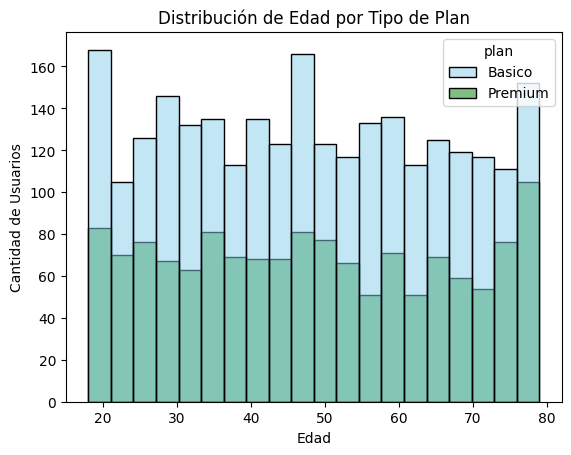

In [57]:

# Histograma para visualizar la edad (age)


sns.histplot(data=user_profile,
    x="age",
    hue="plan",
    bins=20,
    palette=["skyblue", "green"]
)
plt.title("Distribución de Edad por Tipo de Plan")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Usuarios")
plt.show()

💡Insights: 
- Distribución de edad es aproximadamente simétrica, concentrada en adultos, no existe algún patrón fuerte que indica que un plan esté claramente asociado a un grupo específico.

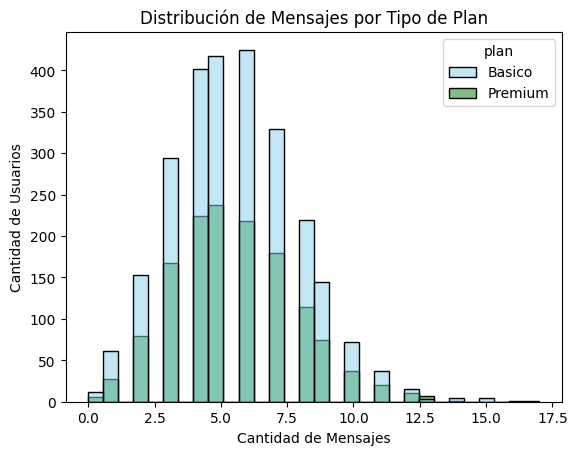

In [59]:
# Histograma para visualizar la cant_mensajes

sns.histplot(
    data=user_profile,
    x="cant_mensajes",
    hue="plan",
    bins=30,
    palette=["skyblue", "green"]
)
plt.title("Distribución de Mensajes por Tipo de Plan")
plt.xlabel("Cantidad de Mensajes")
plt.ylabel("Cantidad de Usuarios")
plt.show()


💡Insights: 
- La distribución esta muy sesgada a la derecha, la mayoría de usuarios envía pocos mensajes y pocos usuarios envían volúmenes muy altos

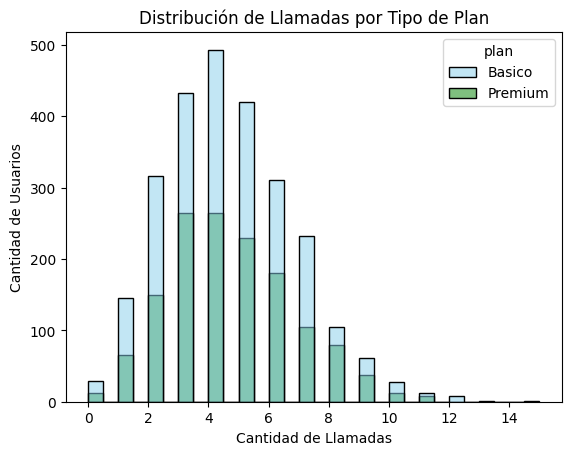

In [60]:
# Histograma para visualizar la cant_llamadas
sns.histplot(
    data=user_profile,
    x="cant_llamadas",
    hue="plan",
    bins=30,
    palette=["skyblue", "green"]
)
plt.title("Distribución de Llamadas por Tipo de Plan")
plt.xlabel("Cantidad de Llamadas")
plt.ylabel("Cantidad de Usuarios")
plt.show()

💡Insights: 
- Distribución sesgada a la derecha, similar a la de mensajes, muchos usuarios realizan pocas llamadas y pocos usuarios concentran muchas llamadas
- El plan premium tiene una mayor frecuencia de usuarios con un número de llamadas muy alto, esto sugiere que los usuarios premium explotan mas los servicios de voz.

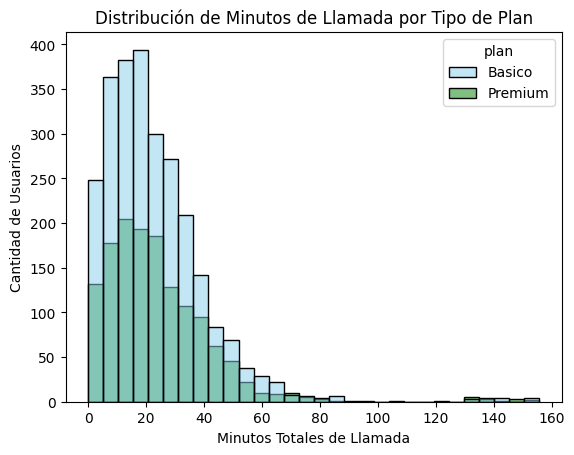

In [61]:

# Histograma para visualizar la cant_minutos_llamada
sns.histplot(
    data=user_profile,
    x="cant_minutos_llamada",
    hue="plan",
    bins=30,
    palette=["skyblue", "green"]
)
plt.title("Distribución de Minutos de Llamada por Tipo de Plan")
plt.xlabel("Minutos Totales de Llamada")
plt.ylabel("Cantidad de Usuarios")
plt.show()


💡Insights: 
- Distribución altamente sesgada a la derecha con outliers muy claros.
- El plan premium presenta usuarios con consumos muy elevados y menos elevados en básicos, esto nos indica que los planes premium capturan a los usuarios intensivos

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

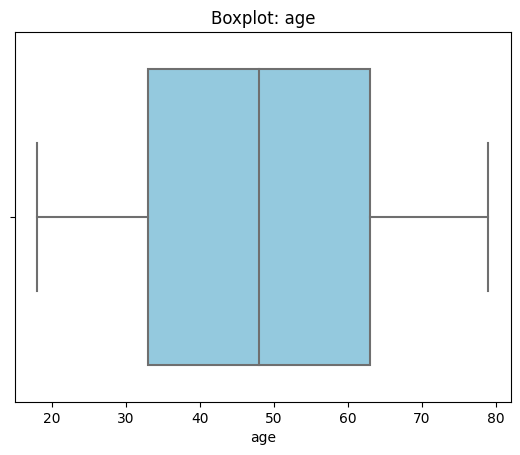

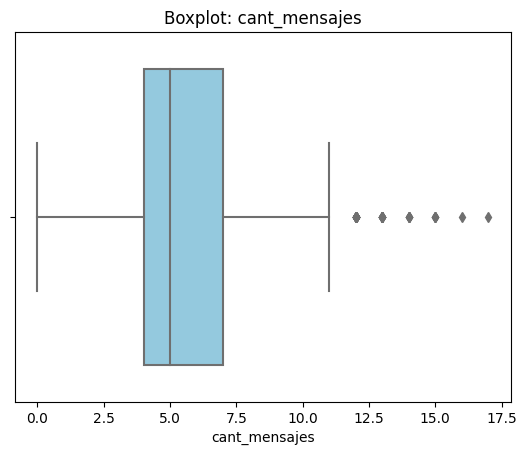

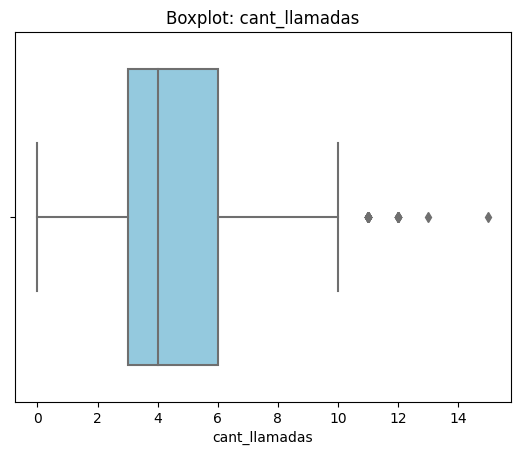

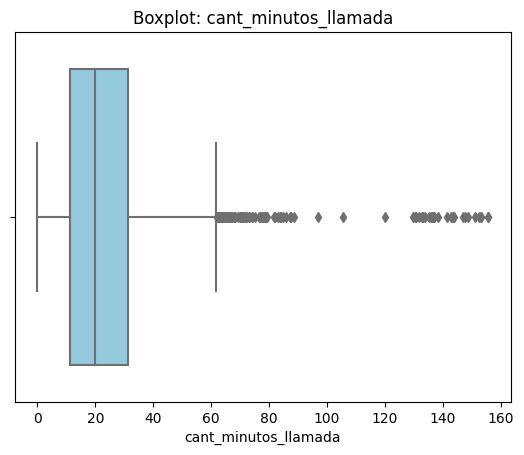

In [62]:

# Visualizando usando BoxPlot
columnas_numericas = [
    'age',
    'cant_mensajes',
    'cant_llamadas',
    'cant_minutos_llamada'
]

for col in columnas_numericas:
    sns.boxplot(x=user_profile[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.show()

💡Insights: 
- Age: No presenta Outliers relevantes, es coherente con edades humanas plausibles
- cant_mensajes: Si presenta Outliers claros por el lado superior, pocos usuarios concentran una cantidad exagerada de mensajes
- cant_llamadas: Si presenta Outliers superiores, aunque menos extremos que en mensajes. 
- cant_minutos_llamada: Si presenta Outliers muy marcados por el lado superior por usuarios con consumo intensivo

In [63]:

# Calcular límites con el método IQR
columnas_limites = [
        'cant_mensajes',
    'cant_llamadas',
    'cant_minutos_llamada'
]

for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR

    print(f'{col}')
    print(f'  Límite superior IQR: {upper_limit:.2f}')
    print(f'  Valor máximo observado: {user_profile[col].max()}')
    print()




cant_mensajes
  Límite superior IQR: 11.50
  Valor máximo observado: 17.0

cant_llamadas
  Límite superior IQR: 10.50
  Valor máximo observado: 15.0

cant_minutos_llamada
  Límite superior IQR: 61.86
  Valor máximo observado: 155.69



In [64]:

# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()


,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights: 
- cant_mensajes: mantener o no outliers, porqué?
    Mantener Outliers, por que son usuarios con uso intensivo real, son clave para posible diseño de planes 
- cant_llamadas: mantener o no outliers, porqué?
    Mantener Outliers, por que al igual que la cantidad de mensajes, son consistentes con perfiles de alto consumo 
- cant_minutos_llamada: mantener o no outliers, porqué?
    Mantener Outliers, Tal vez sean extremos pero reflejan un comportamiento válido en los negocios. Eliminarlos podría distorsionar el análisis de los planes premium

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [65]:
# Crear columna grupo_uso
user_profile["grupo_uso"] = "Alto uso"  # valor por defecto

user_profile.loc[
    (user_profile["cant_llamadas"] < 5) & (user_profile["cant_mensajes"] < 5),
    "grupo_uso"
] = "Bajo uso"

user_profile.loc[
    (user_profile["cant_llamadas"] < 10) & (user_profile["cant_mensajes"] < 10) &
    (user_profile["grupo_uso"] != "Bajo uso"),
    "grupo_uso"
] = "Uso medio"

In [66]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [67]:
# Crear columna grupo_edad
user_profile["grupo_edad"] = "Adulto Mayor"  # valor por defecto

user_profile.loc[
    user_profile["age"] < 30,
    "grupo_edad"
] = "Joven"

user_profile.loc[
    (user_profile["age"] < 60) & (user_profile["grupo_edad"] != "Joven"),
    "grupo_edad"
] = "Adulto"

In [68]:

# verificar cambios
user_profile.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

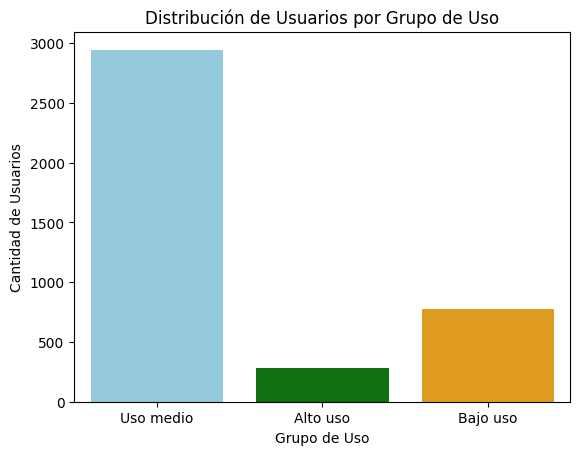

In [70]:
# Visualización de los segmentos por uso
sns.countplot(
data=user_profile,
    x="grupo_uso",
    palette=["skyblue", "green", "orange"]
)
plt.title("Distribución de Usuarios por Grupo de Uso")
plt.xlabel("Grupo de Uso")
plt.ylabel("Cantidad de Usuarios")
plt.show()

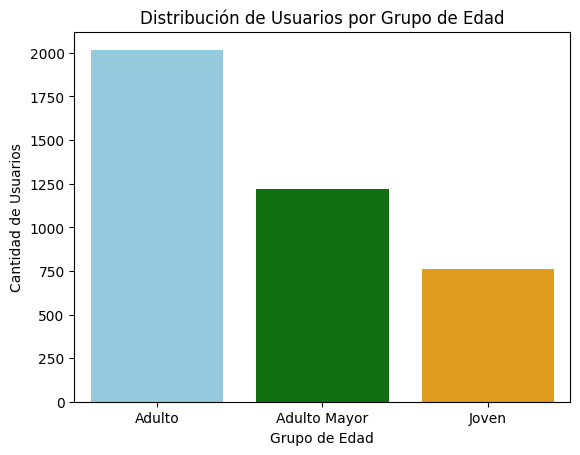

In [71]:
# Visualización de los segmentos por edad
sns.countplot(
    data=user_profile,
    x="grupo_edad",
    palette=["skyblue", "green", "orange"]
)
plt.title("Distribución de Usuarios por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad de Usuarios")
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?

- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ 
**Problemas detectados en los datos**
-En users.age se identificó el sentinel -999, presente en una proporción reducida de registros pero con impacto directo en las métricas de edad, el cuál se sustituyó por la mediana para mantener la distribución sin sesgar el análisis.

En users.city apareció el valor "?", considerado dato inválido, el cuál se marcó como NA.

En usage, las columnas duration y length presentan nulos: los mensajes no generan duración, las llamadas no generan longitud así que los nulos se confirmaron como MAR y se conservaron.

🔍 **Segmentos por Edad**
Se definieron tres grupos: Joven (<30), Adulto (30–59) y Adulto Mayor (60+).
La base se concentra mayoritariamente en el grupo Adulto.
Jóvenes y Adultos Mayores representan segmentos más pequeños, pero con patrones diferenciados.
La edad por sí sola no explica el consumo, pero combinada con variables de uso mejora la segmentación.


📊 **Segmentos por Nivel de Uso**
Los usuarios se clasificaron en Bajo uso, Uso medio y Alto uso según llamadas y mensajes.
El segmento Alto uso es reducido en volumen, pero concentra consumos muy por encima del promedio.
Bajo y Uso medio agrupan a la mayoría de los usuarios y presentan comportamiento más estable.


➡️ Esto sugiere que el negocio se apoya en una base amplia de consumo bajo/medio, mientras que un grupo pequeño de usuarios intensivos explica una parte relevante del uso total.

Se detectaron outliers superiores en:
    -Cantidad de mensajes,
    -Cantidad de llamadas,
    -Minutos totales de llamada.

Estos valores no son errores, sino usuarios de consumo intensivo real, mayoritariamente asociados a planes Premium.
Eliminarlos habría ocultado información crítica sobre clientes de alto valor.

💡 **Recomendaciones**
-Diseñar planes específicos para usuarios intensivos, con beneficios claros en minutos y mensajes.
-Crear escalones intermedios o promociones dirigidas a usuarios de Uso medio, creando un incentivo para su migración a planes de mayor valor.
-Ofrecer planes más flexibles y económicos para usuarios de Bajo uso, priorizando retención.


---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí` https://github.com/oscarruizo/connectatel-analisis-de-uso-y-segmentacion-de-clientes-latam